## Import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\GRZEGORZ\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


<br>

We will use daily Microsoft returns from 2001-today

In [4]:
import yfinance as yf
from datetime import datetime

# Microsoft sotck data
msft = yf.Ticker("MSFT")
ms = msft.history(start="2001-01-01", end=datetime.today().strftime('%Y-%m-%d'))

ms.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-01-02 00:00:00-05:00,13.677950,13.949184,13.290472,13.445463,82413200,0.0,0.0
2001-01-03 00:00:00-05:00,13.387338,15.150360,13.367964,14.859752,135962200,0.0,0.0
2001-01-04 00:00:00-05:00,14.821007,15.654083,14.530399,15.014746,112397000,0.0,0.0
2001-01-05 00:00:00-05:00,15.034123,15.460348,14.743515,15.227861,93414600,0.0,0.0
2001-01-08 00:00:00-05:00,15.169742,15.421602,14.472282,15.169742,79817600,0.0,0.0


In [5]:
ms = ms.iloc[:, :-2]

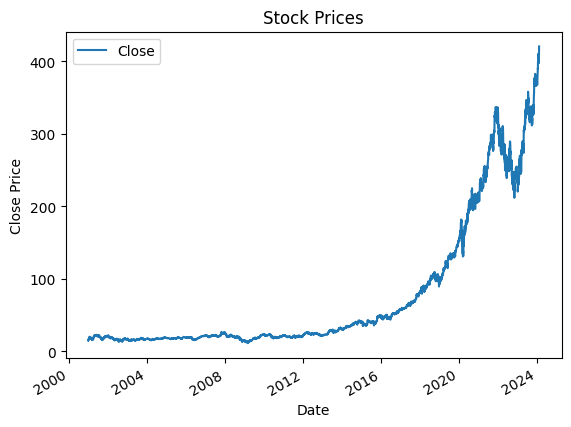

In [14]:
ms.plot( y='Close', kind='line')
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [6]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5813 entries, 2001-01-02 00:00:00-05:00 to 2024-02-09 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5813 non-null   float64
 1   High    5813 non-null   float64
 2   Low     5813 non-null   float64
 3   Close   5813 non-null   float64
 4   Volume  5813 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 272.5 KB


<br>

## Analysis

In our analyses, we will particularly focus on logarithmic rates of return, which are calculated according to the formula: 
$$
\log \left( \frac{P_{t}}{P_{t-1}} \right)
$$

In [7]:
ms['Return'] = 100 * (ms['Close'].pct_change())
ms['Log Return'] = np.log(ms['Close']).diff().mul(100)
ms = ms.dropna()

<br>

### Plots

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import probplot
from statsmodels.tsa.stattools import acf, adfuller, q_stat
from statsmodels.tools import add_constant
#from hurst import compute_Hc

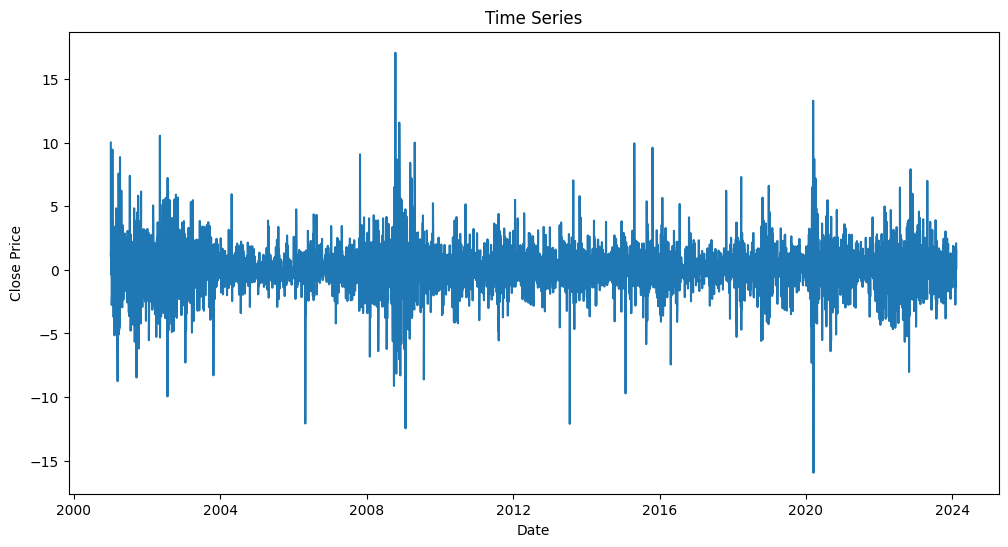

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(ms['Log Return'])
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

<Figure size 1200x600 with 0 Axes>

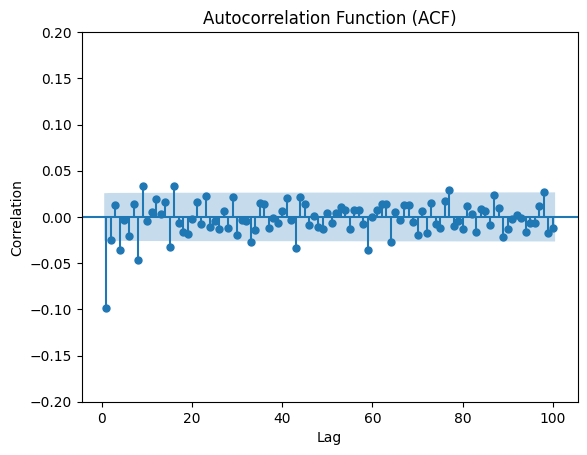

In [28]:
plt.figure(figsize=(12, 6))
plot_acf(x=ms['Log Return'], lags=100, zero=False)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.ylim(-0.2, 0.2)

plt.show()


In [26]:
ms.tail()

,Open,High,Low,Close,Volume,Return,Log Return
Date,,,,,,,
2024-02-05 00:00:00-05:00,409.899994,411.160004,403.989990,405.649994,25352300,-1.354508,-1.363765
2024-02-06 00:00:00-05:00,405.880005,407.970001,402.910004,405.489990,18382600,-0.039444,-0.039452
2024-02-07 00:00:00-05:00,407.440002,414.299988,407.399994,414.049988,22340500,2.111026,2.089052
2024-02-08 00:00:00-05:00,414.049988,415.559998,412.529999,414.109985,21225300,0.014490,0.014489
2024-02-09 00:00:00-05:00,415.250000,420.820007,415.089996,420.549988,22012900,1.555143,1.543175
